
    classifiers used
        logistic regression
        knn
        desicion tree
        svm
        naivebias

        ensemble methods:
            bagging
                random forest 

            boosting
                gradient boost  
                ada boost
                xg boost
                cat boost


        hyperparameter tuning(depending on model):
            random or grid search cv
            


    cross validation
    evaluation and validation :
        ROC-AUC curve
        r2 score
        confuction matrix

## imports

In [29]:
import sklearn as sk
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from IPython.display import display


In [30]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report , r2_score
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.svm import SVC


import seaborn as sns
import hvplot.pandas

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)


## helper functions for plotting and visualization


In [31]:
# helper functions for plotting and visualization

#  for plotting confusion matrix
def plot_confusion_matrix(model, x_test, y_test):
    cm = confusion_matrix(y_test, model.predict(x_test))
    # cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
    score = model.score(x_test, y_test)
    plt.figure(figsize=(9, 9))
    sns.heatmap(cm, annot=True, fmt=".1f", linewidths=.5,
                square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size=15)


# for printing the precision , recall , f1-score , ROC(AOC) , classification report
def print_metrics(model, x_train, x_test, y_train, y_test):
    print("The Training Accuracy is: ", model.score(x_train, y_train))
    print("The Testing Accuracy is: ", model.score(x_test, y_test))
    y_pred = model.predict(x_test)
    r2__score = r2_score(y_test, y_pred)
    
    precision = precision_score(y_test, y_pred, average='weighted', 
                          labels=np.unique(y_pred))
    
    recall = recall_score(y_test, y_pred, average='weighted',
                          labels=np.unique(y_pred))

    score=f1_score(y_test, y_pred, average = 'weighted',
                     labels=np.unique(y_pred))
    
    ROC_AUC = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    print("The R2 score is: ", r2__score)
    print('Precision: %.3f' % precision)
    print('Recall: %.3f' % recall)
    print('F1-Measure: %.3f' % score)
    print('ROC_AUC: %.3f' % ROC_AUC)
    print(
        f'the classification report is \n {classification_report(y_test, y_pred , labels=np.unique(y_pred))}')


# for plotting the ROC curve (takes the model and test data as inputs)
def plot_roc(model, name,  x_test, y_test):
    pred_prob = model.predict_proba(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:, 1])

    # roc curve for tpr = fpr
    random_probs = [0 for i in range(len(y_test))]
    p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

    auc_score = auc(fpr, tpr)

    plt.figure(figsize=(10, 10))
    plt.style.use('seaborn')

    plt.plot(fpr, tpr, linestyle='--', color='green',
             label=f'{name} ROC (AUC = %0.4f)' % auc_score)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    plt.legend(loc='lower right')
    plt.title("ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.show()


## data preprocessing and EDA

    >>> 

In [32]:
import glob
path = glob.glob(r'./IBM/*.csv')
path

['./IBM\\WA_Fn-UseC_-HR-Employee-Attrition.csv']

In [33]:
df = pd.read_csv(path[0])

In [34]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [35]:
# print(df.info())
# display(df.describe())

In [36]:
print('size of the original dataframe is: ', df.shape)

size of the original dataframe is:  (1470, 35)


In [37]:
print('max perf' , df['PerformanceRating'].max())
print('min perf',df['PerformanceRating'].min())
# print(df['PerformanceRating'].head())
for column in df[['Attrition', 'PerformanceRating']].columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")


max perf 4
min perf 3
Attrition: Number of unique values 2
PerformanceRating: Number of unique values 2


In [38]:
df['PerformanceRating'].replace([3,4], [0 , 1], inplace=True)
print(df['PerformanceRating'].head().to_markdown())


|    |   PerformanceRating |
|---:|--------------------:|
|  0 |                   0 |
|  1 |                   1 |
|  2 |                   0 |
|  3 |                   0 |
|  4 |                   0 |


In [39]:
from sklearn.preprocessing import LabelEncoder
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and df[column].nunique() < 10:
        categorical_col.append(column)

# df['Attrition'] = df.Attrition.astype("category").cat.codes
# categorical_col.remove('Attrition')
label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

# now the dataset is all numerical

<AxesSubplot:>

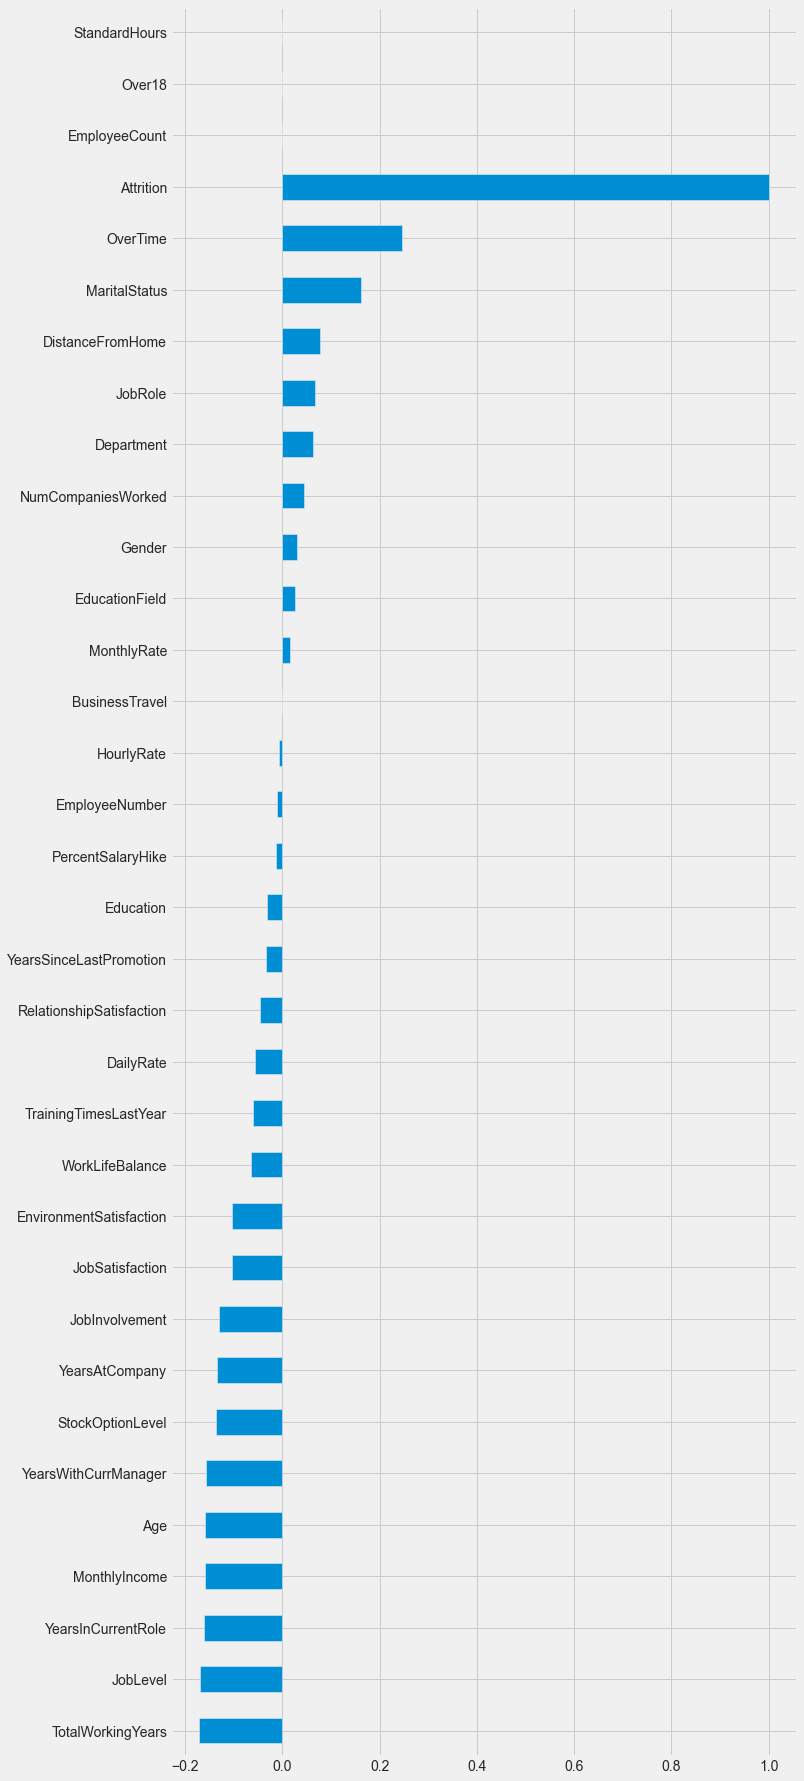

In [40]:
df.drop('PerformanceRating', axis=1).corrwith(
    df.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))


In [41]:
# as we see there is no correlation between the PerformanceRating and ( 'EmployeeCount', 'EmployeeNumber', 'Over18','StandardHours')
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18',
        'StandardHours', 'BusinessTravel'], axis="columns", inplace=True)


In [42]:
# x = np.array(df.drop(['Attrition', 'PerformanceRating'], axis=1))
x = np.array(df.drop(['PerformanceRating'], axis=1))
y = np.array(df['PerformanceRating'])

print(df.shape)
print(x.shape)
print(y.shape)


(1470, 30)
(1470, 29)
(1470,)


In [43]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)
# x_train_attr, x_test_attr, y_train_attr, y_test_attr = train_test_split(
#     x, y_attrition, test_size=0.2, random_state=42)
# x_train_perf, x_test_perf, y_train_perf, y_test_perf = train_test_split(
#     x, y_performance, test_size=0.2, random_state=42)
# print(len(x_train_attr) ,len(x_test_attr) ,len(y_train_attr) ,len(y_test_attr))
scaler = StandardScaler()
X_train_std = scaler.fit_transform(x_train)
X_test_std = scaler.transform(x_test)


## various models training , tuning and Evaluation 
        each model has 2 copies trained and tuned >> (for both attrition and for performance)
        first we run all the models on attrition then run the same code for performance later

### KNN

In [44]:
k_values = [i for i in range(1, 60)]
k_acc_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    cv_scores = cross_val_score(knn, x, y, cv=10)
    k_acc_scores.append(cv_scores.mean())



In [45]:
max_index = k_acc_scores. index(max(k_acc_scores))
print(max_index+1, k_acc_scores[max_index])


14 0.8462585034013606


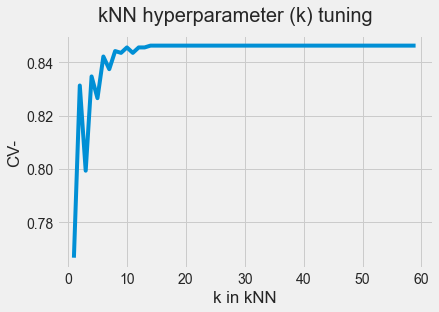

In [46]:
fig2 = plt.figure()
plt.plot(k_values, k_acc_scores)
plt.xlabel('k in kNN')
plt.ylabel('CV-')
fig2.suptitle('kNN hyperparameter (k) tuning ', fontsize=20)
plt.show()



In [47]:
model_knn = KNeighborsClassifier(n_neighbors=max_index+1, n_jobs=-1)
model_knn.fit(x_train,y_train)


KNeighborsClassifier(n_jobs=-1, n_neighbors=14)

The Training Accuracy is:  0.8448275862068966
The Testing Accuracy is:  0.8505434782608695
The R2 score is:  -0.17571884984025554
Precision: 0.851
Recall: 1.000
F1-Measure: 0.919
ROC_AUC: 0.515
the classification report is 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       313

   micro avg       0.85      1.00      0.92       313
   macro avg       0.85      1.00      0.92       313
weighted avg       0.85      1.00      0.92       313



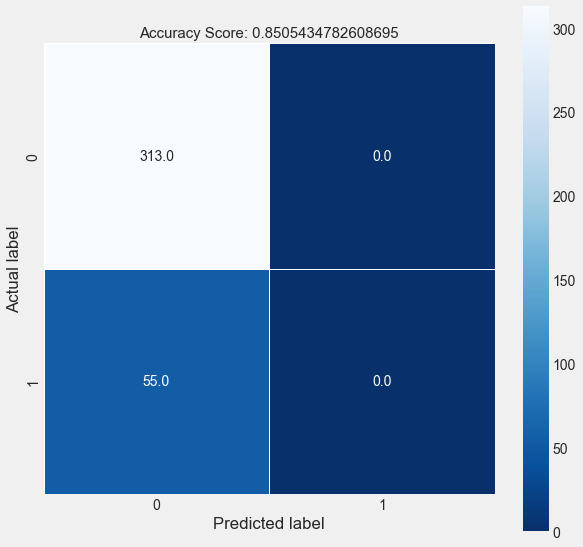

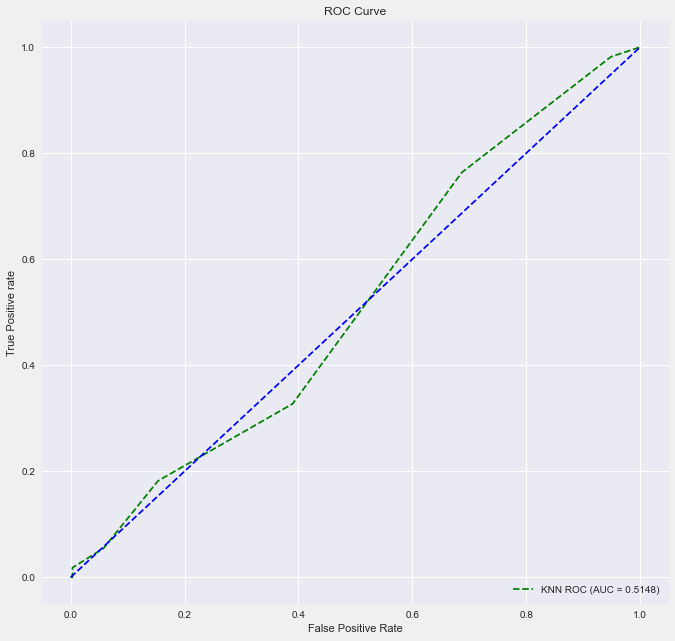

In [48]:
print_metrics(model_knn, x_train, x_test, y_train, y_test)
plot_confusion_matrix(model_knn, x_test, y_test)
plot_roc(model_knn, 'KNN', x_test, y_test)


### Naive bayes

In [49]:
model_NB = GaussianNB()
model_NB.fit(x_train,y_train)
pre=model_NB.predict(x_test)

The Training Accuracy is:  0.9981851179673321
The Testing Accuracy is:  0.9945652173913043
The R2 score is:  0.9572465872785362
Precision: 0.995
Recall: 0.995
F1-Measure: 0.995
ROC_AUC: 1.000
the classification report is 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       313
           1       0.96      1.00      0.98        55

    accuracy                           0.99       368
   macro avg       0.98      1.00      0.99       368
weighted avg       0.99      0.99      0.99       368



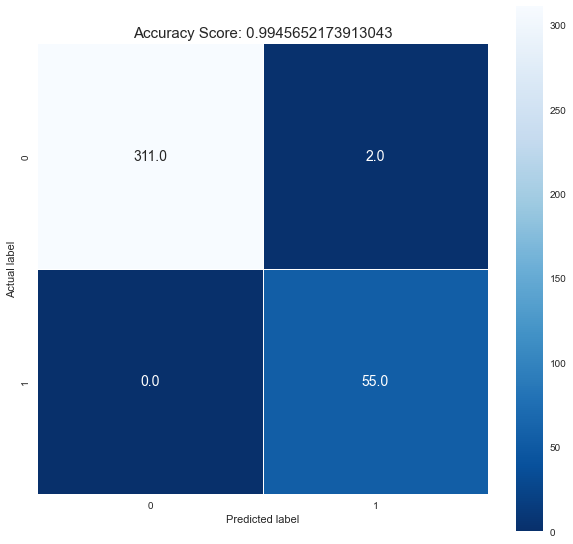

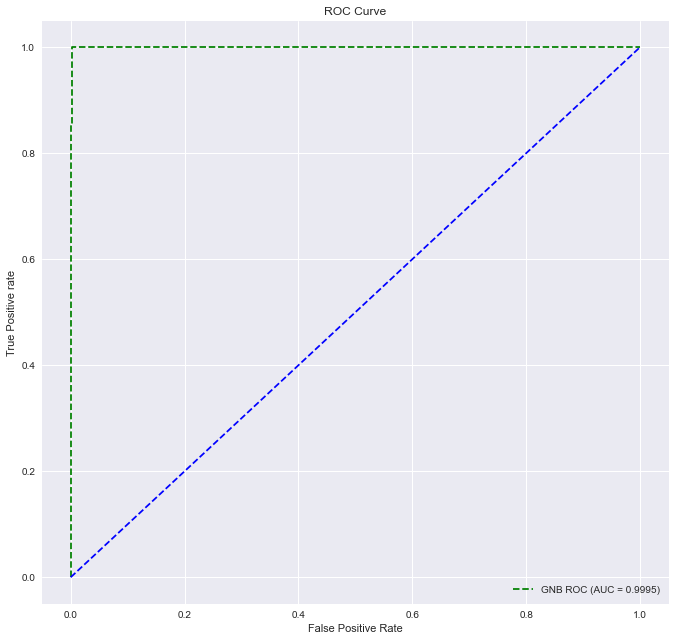

In [50]:
print_metrics(model_NB , x_train , x_test , y_train , y_test)
plot_confusion_matrix(model_NB , x_test , y_test)
plot_roc(model_NB , 'GNB' , x_test , y_test)

### Logistic Regression


In [51]:
model = LogisticRegression(max_iter=1000000)
model.fit(x_train,y_train)
model.get_params()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [52]:
print_metrics(model, x_train, x_test, y_train, y_test)


The Training Accuracy is:  0.9891107078039928
The Testing Accuracy is:  0.9945652173913043
The R2 score is:  0.9572465872785362
Precision: 0.995
Recall: 0.995
F1-Measure: 0.995
ROC_AUC: 0.999
the classification report is 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       313
           1       0.96      1.00      0.98        55

    accuracy                           0.99       368
   macro avg       0.98      1.00      0.99       368
weighted avg       0.99      0.99      0.99       368



In [53]:
param_grid = [
    {
        'penalty': ['l2', 'l1', 'elasticnet', 'none'],
        'C': [100, 10, 1.0, 0.1, 0.01],
        # 'C'  : np.logspace(-4, 4, 20),
        'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    }
]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
best_model_search = GridSearchCV(LogisticRegression(
    max_iter=1000000), param_grid=param_grid, n_jobs=-1, cv=cv, verbose=True, scoring='accuracy', error_score=0)
grid_result = best_model_search.fit(x_train, y_train)
model_log_reg = grid_result.best_estimator_


Fitting 30 folds for each of 60 candidates, totalling 1800 fits


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_mode

In [54]:
model_log_reg.get_params()


{'C': 100,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

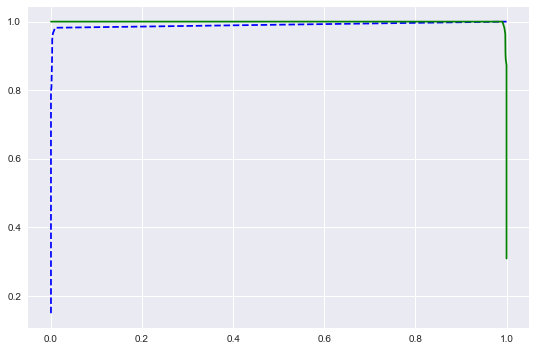

In [55]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(
    y_test, model_log_reg.predict_proba(x_test)[:, 1])
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')


The Training Accuracy is:  1.0
The Testing Accuracy is:  1.0
The R2 score is:  1.0
Precision: 1.000
Recall: 1.000
F1-Measure: 1.000
ROC_AUC: 1.000
the classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00        55

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



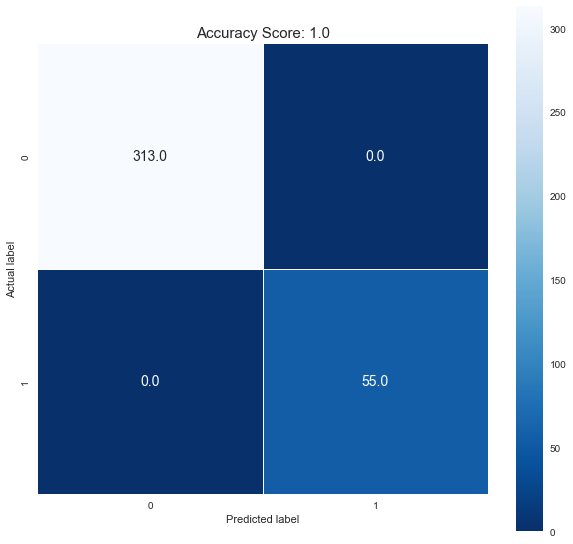

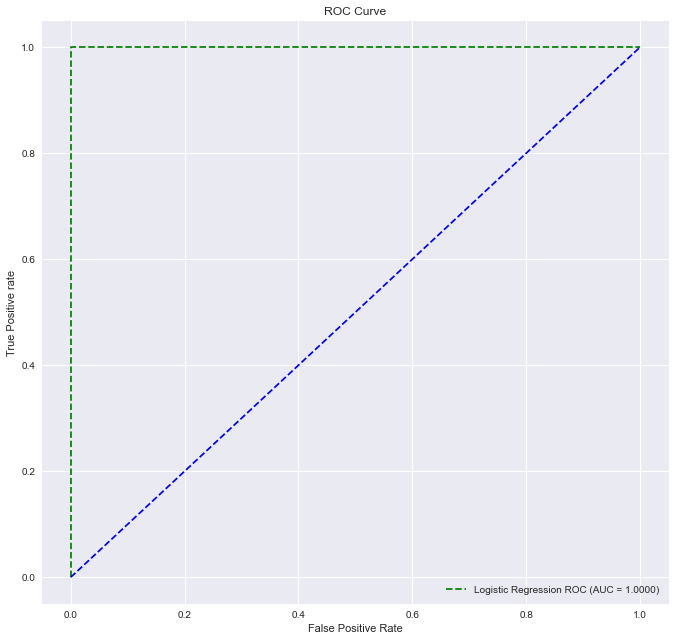

In [56]:
print_metrics(model_log_reg, x_train, x_test, y_train, y_test)
plot_confusion_matrix(model_log_reg, x_test, y_test)
plot_roc(model_log_reg, 'Logistic Regression', x_test, y_test)


### Decision tree

In [57]:
space =dict()
space['max_depth']=[i for i in range(1,50)]
space['max_leaf_nodes']=[i for i in range(2,50)]
space['min_samples_split']=[i for i in range(2,10)]
space['min_samples_leaf']=[i for i in range(1,4)]
# space['criterion']=['gini','entropy']
space['criterion']=['gini' ]

In [58]:
# des_tree = tree.DecisionTreeClassifier(splitter='best',random_state=42)   
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)        
# # random_search = RandomizedSearchCV(des_tree, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=42,error_score='raise' , verbose  = 1)    
# search_result = random_search.fit(x_train, y_train)
# model_tree = search_result.best_estimator_




params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = tree.DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
search_result = tree_cv.fit(x_train, y_train)
model_tree = search_result.best_estimator_


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


In [59]:
print('Best Score: %s' % search_result.best_score_)
print('Best Hyperparameters: %s' % search_result.best_params_)
print(model_tree)


Best Score: 1.0
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=1, random_state=42)


The Training Accuracy is:  1.0
The Testing Accuracy is:  1.0
The R2 score is:  1.0
Precision: 1.000
Recall: 1.000
F1-Measure: 1.000
ROC_AUC: 1.000
the classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00        55

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



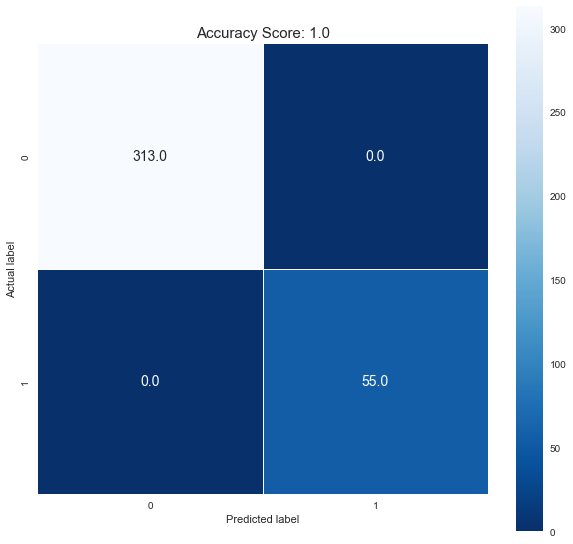

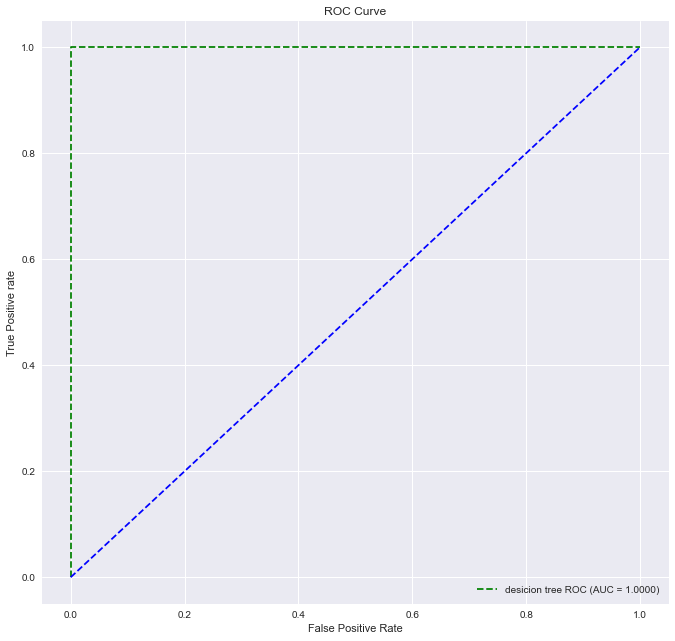

In [60]:
print_metrics(model_tree,x_train,x_test,y_train,y_test)
plot_confusion_matrix(model_tree , x_test , y_test)
plot_roc(model_tree , 'desicion tree',x_test,y_test)

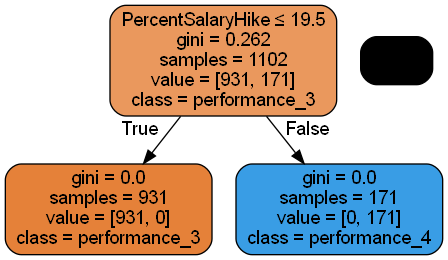

In [61]:
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
dot_data = StringIO()
export_graphviz(model_tree, out_file=dot_data, rounded=True, filled=True, special_characters=True,
                feature_names=df.drop(['PerformanceRating'], axis=1).columns, class_names=['performance_3', 'performance_4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('desicion_tree_IBM_performance.png')
Image(graph.create_png())


### SVM

SVC(kernel='linear', probability=True)
The Training Accuracy is:  1.0
The Testing Accuracy is:  1.0
The R2 score is:  1.0
Precision: 1.000
Recall: 1.000
F1-Measure: 1.000
ROC_AUC: 1.000
the classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00        55

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



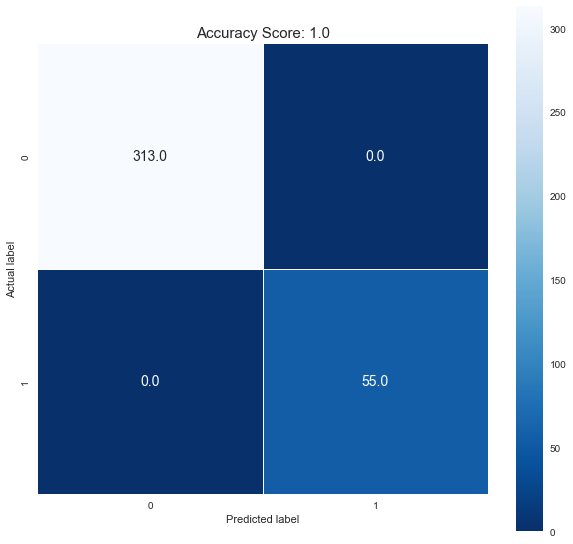

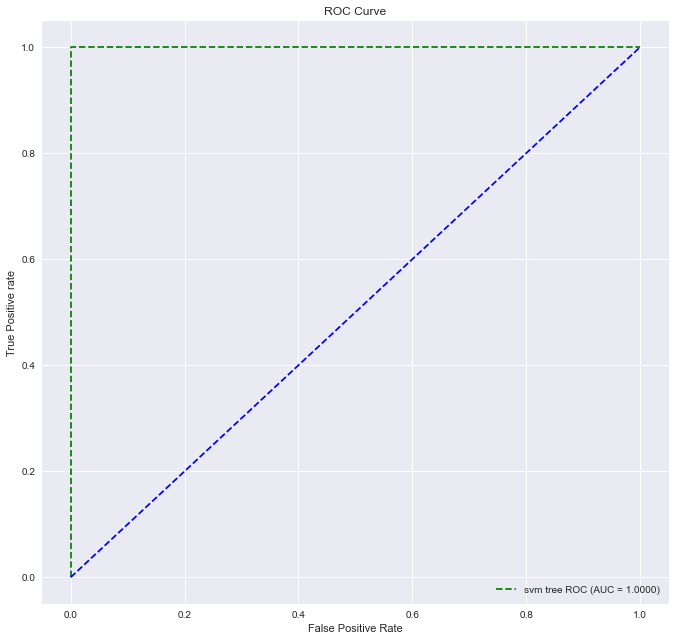

In [62]:
svm_clf = SVC(kernel='linear' , probability=True)
svm_clf.fit(X_train_std, y_train)

print(svm_clf)
print_metrics(svm_clf, X_train_std, X_test_std, y_train, y_test)
plot_confusion_matrix(svm_clf, X_test_std, y_test)
plot_roc(svm_clf , 'svm tree',X_test_std,y_test)

In [63]:
svm_clf = SVC(random_state=42 , probability=True)

param_grid = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]


# # param_grid = {
# #     # 'C': np.logspace(-4,4,100),
# #     # 'gamma': np.logspace(-4,4,20),
# #     'C': np.logspace(-2, 10, 13),
# #     'gamma':  np.logspace(-9, 3, 13),
# #     'kernel':  ['rbf'],
# #     #   'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']

# # }
# # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

search = GridSearchCV(svm_clf, param_grid=param_grid,
                      scoring='roc_auc', cv=3, refit=True, verbose=1)
search.fit(X_train_std, y_train)
model_SVC = search.best_estimator_



Fitting 3 folds for each of 12 candidates, totalling 36 fits


The Training Accuracy is:  1.0
The Testing Accuracy is:  1.0
The R2 score is:  1.0
Precision: 1.000
Recall: 1.000
F1-Measure: 1.000
ROC_AUC: 1.000
the classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00        55

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



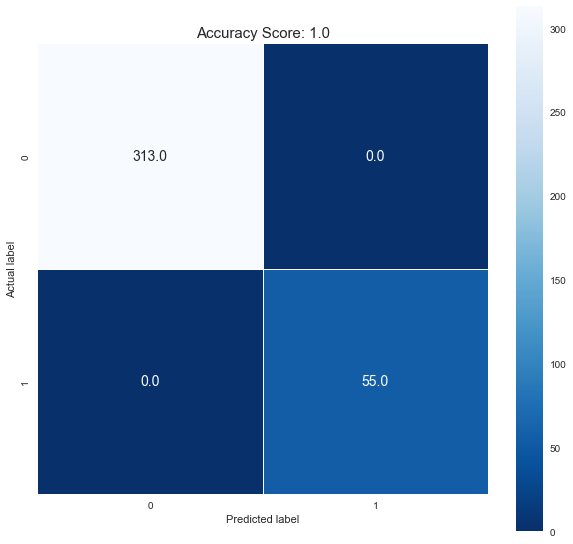

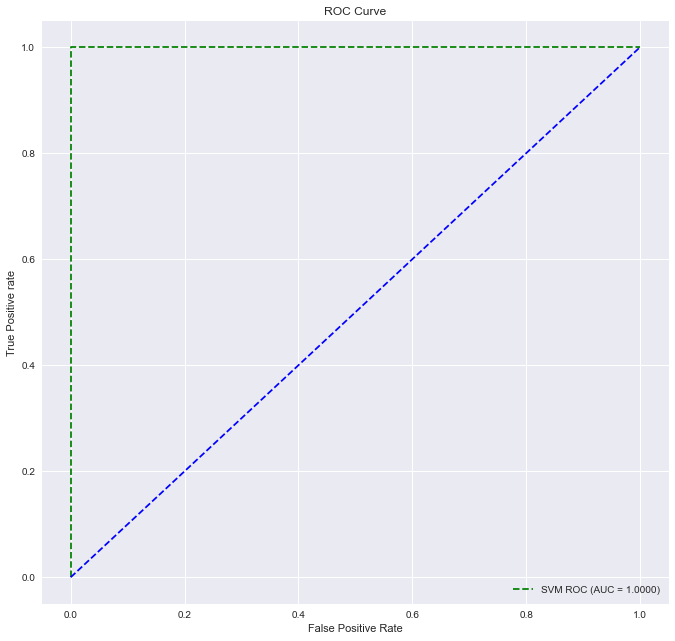

In [64]:
model_SVC.fit(X_train_std, y_train)
print_metrics(model_SVC, X_train_std, X_test_std, y_train, y_test)
plot_confusion_matrix(model_SVC, X_test_std, y_test)
plot_roc(model_SVC , 'SVM',X_test_std,y_test)

### bagging >>  Random forest

The Training Accuracy is:  1.0
The Testing Accuracy is:  1.0
The R2 score is:  1.0
Precision: 1.000
Recall: 1.000
F1-Measure: 1.000
ROC_AUC: 1.000
the classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00        55

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



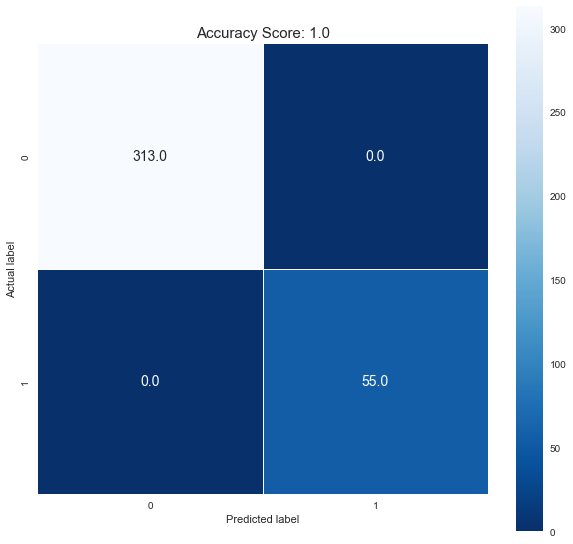

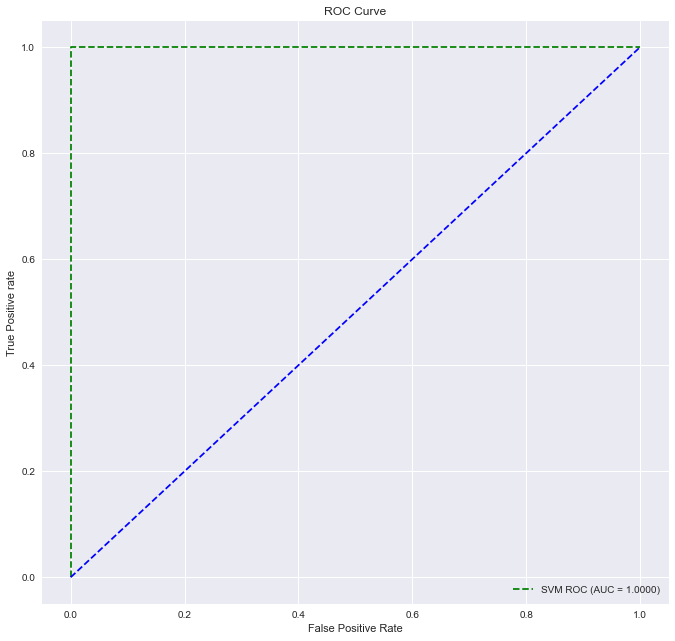

In [68]:
from sklearn.ensemble import RandomForestClassifier


# x_train_norm = normalize(x_train, norm='l2')
# x_test_norm = normalize(x_test, norm='l2')

rf_clf = RandomForestClassifier(n_estimators=100) 

rf_clf.fit(x_train, y_train)


# print_metrics(rf_clf, x_train_norm, x_test_norm, y_train, y_test)
print_metrics(rf_clf, x_train, x_test, y_train, y_test)
plot_confusion_matrix(rf_clf, x_test, y_test)
plot_roc(rf_clf , 'SVM',x_test,y_test)

In [66]:
param_grid = dict(
    n_estimators=[100, 500, 900],
    max_features=['auto', 'sqrt'],
    max_depth=[2, 3, 5, 10, 15, None],
    min_samples_split=[2, 5, 10],
    min_samples_leaf=[1, 2, 4],
    bootstrap=[True, False]
)

rf_clf = RandomForestClassifier(random_state=42)
search = GridSearchCV(rf_clf, param_grid=param_grid,
                      scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
search.fit(x_train, y_train)

rf_clf = RandomForestClassifier(**search.best_params_, random_state=42)
rf_clf.fit(x_train, y_train)
# evaluate(rf_clf, x_train, x_test, y_train, y_test)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


KeyboardInterrupt: 

The Training Accuracy is:  1.0
The Testing Accuracy is:  1.0
The R2 score is:  1.0
Precision: 1.000
Recall: 1.000
F1-Measure: 1.000
ROC_AUC: 1.000
the classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00        55

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



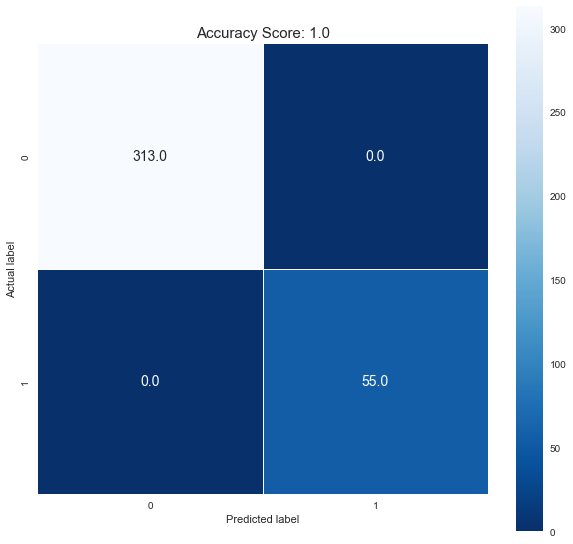

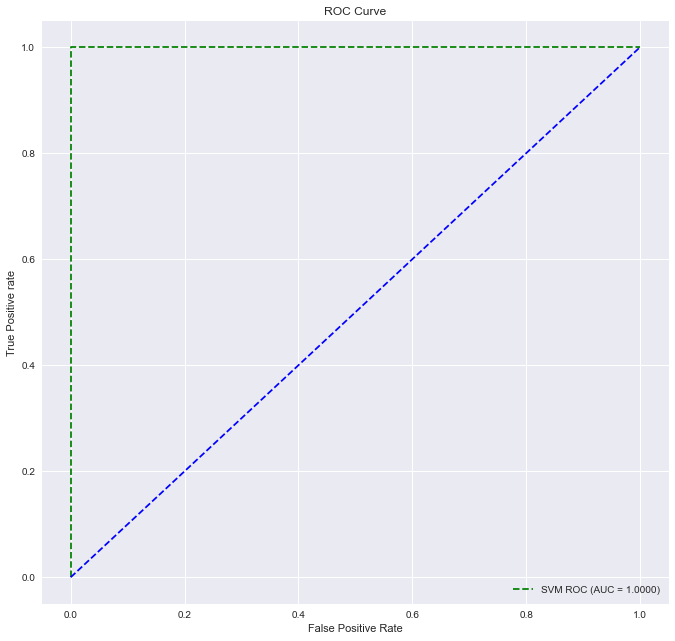

In [69]:
print_metrics(rf_clf, x_train, x_test, y_train, y_test)
plot_confusion_matrix(rf_clf, x_test, y_test)
plot_roc(rf_clf , 'SVM',x_test,y_test)

### boosting  - XGboost

In [70]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)

# evaluate(xgb_clf, X_train, X_test, y_train, y_test)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

The Training Accuracy is:  1.0
The Testing Accuracy is:  1.0
The R2 score is:  1.0
Precision: 1.000
Recall: 1.000
F1-Measure: 1.000
ROC_AUC: 1.000
the classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00        55

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



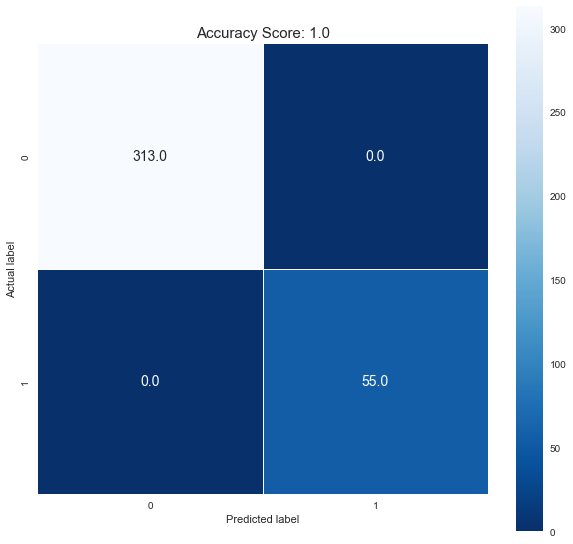

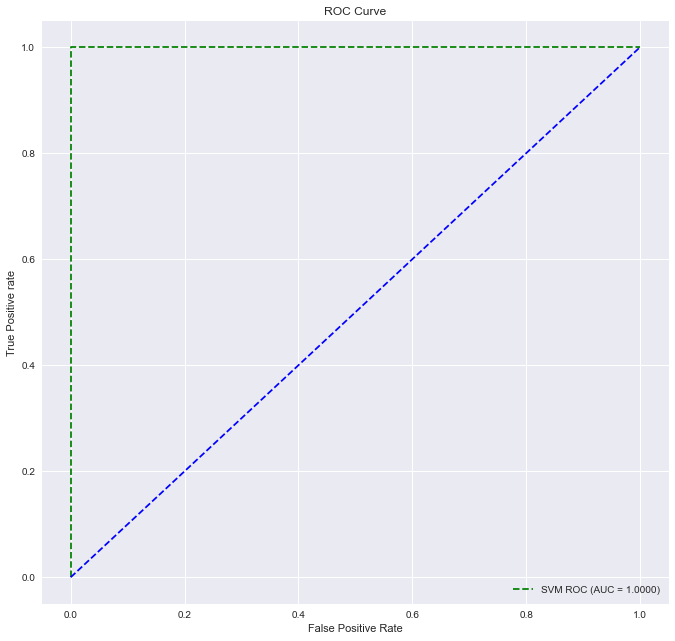

In [71]:
print_metrics(xgb_clf, x_train, x_test, y_train, y_test)
plot_confusion_matrix(xgb_clf, x_test, y_test)
plot_roc(xgb_clf , 'SVM',x_test,y_test)

In [72]:
print(x_train.shape, y_train.shape)


(1102, 29) (1102,)


In [73]:


def random_search_tuning():

    params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'num_class': [10]
              }

    xgbclf = XGBClassifier()
    clf = RandomizedSearchCV(estimator=xgbclf,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=50,
                             n_jobs=-1,
                             verbose=1)
    return clf
    # clf.fit(x_train, y_train)
    # best_model = clf.best_estimator_
    # # best_combination = clf.best_params_

    # return best_model


# xgb_clf = random_search_tuning()
# xgb_clf.fit(x_train, y_train)
# xgb_clf = xgb_clf.best_estimator_



In [ ]:
# xgb_clf.fit(x_train, y_train)

In [74]:
xgb_clf


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

The Training Accuracy is:  1.0
The Testing Accuracy is:  1.0
The R2 score is:  1.0
Precision: 1.000
Recall: 1.000
F1-Measure: 1.000
ROC_AUC: 1.000
the classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00        55

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



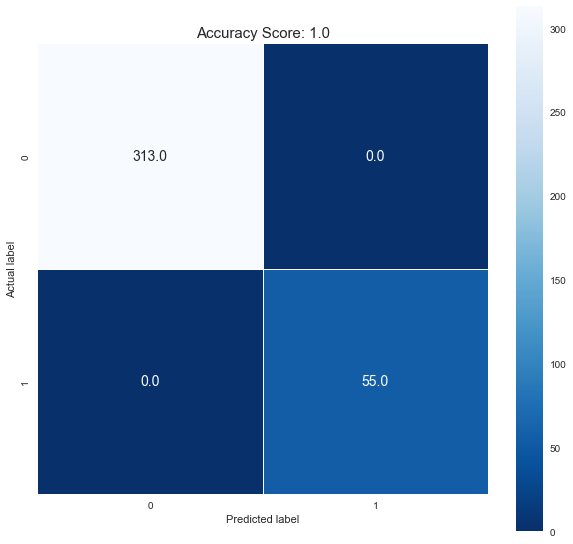

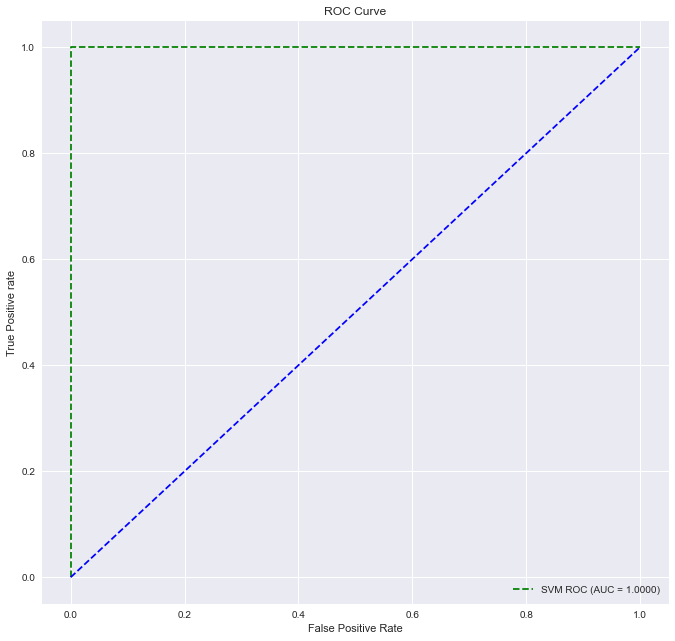

In [75]:
print_metrics(xgb_clf, x_train, x_test, y_train, y_test)
plot_confusion_matrix(xgb_clf, x_test, y_test)
plot_roc(xgb_clf , 'SVM',x_test,y_test)

### light gradient boost
        we should hyperparameter tune lightgbm and catboost with similar methods as we tuned XGboost 

In [76]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier()
lgb_clf.fit(x_train, y_train)



LGBMClassifier()

The Training Accuracy is:  1.0
The Testing Accuracy is:  1.0
The R2 score is:  1.0
Precision: 1.000
Recall: 1.000
F1-Measure: 1.000
ROC_AUC: 1.000
the classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00        55

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



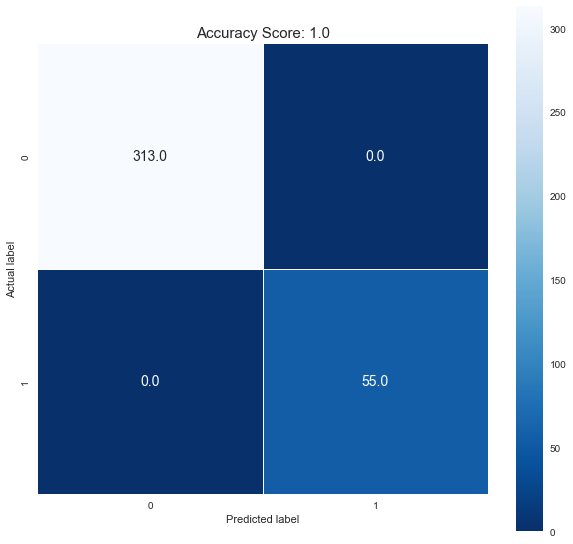

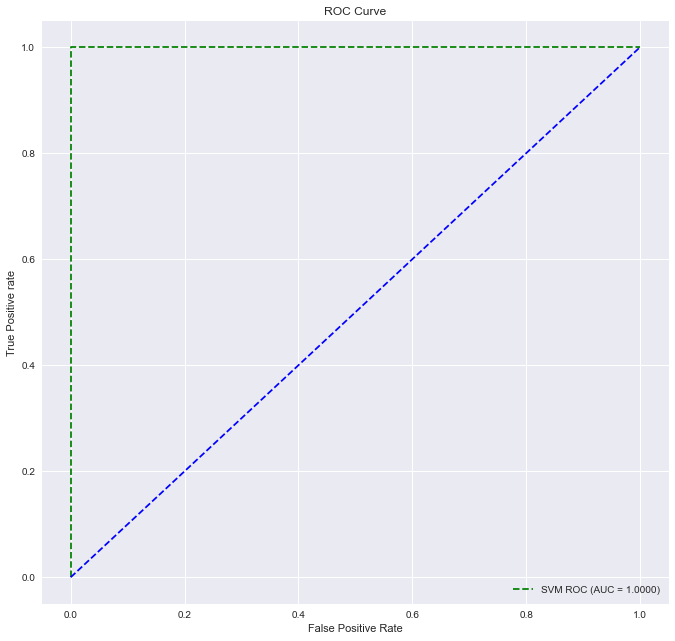

In [77]:
print_metrics(lgb_clf, x_train, x_test, y_train, y_test)
plot_confusion_matrix(lgb_clf, x_test, y_test)
plot_roc(lgb_clf , 'SVM',x_test,y_test)

### cat boost

In [78]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()
cb_clf.fit(x_train, y_train, verbose=0)



The Training Accuracy is:  1.0
The Testing Accuracy is:  1.0
The R2 score is:  1.0
Precision: 1.000
Recall: 1.000
F1-Measure: 1.000
ROC_AUC: 1.000
the classification report is 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00        55

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368



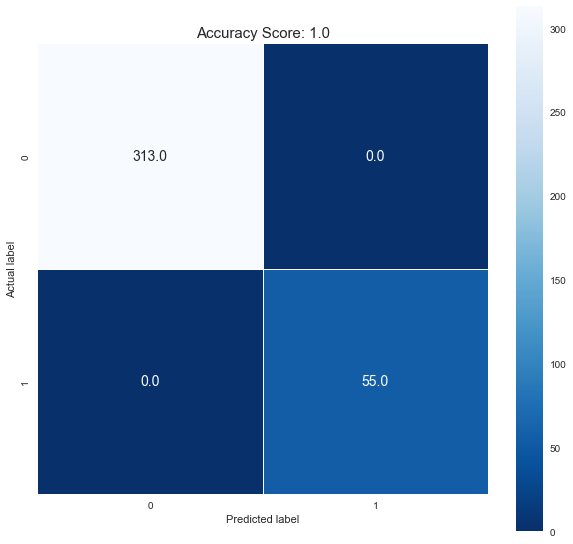

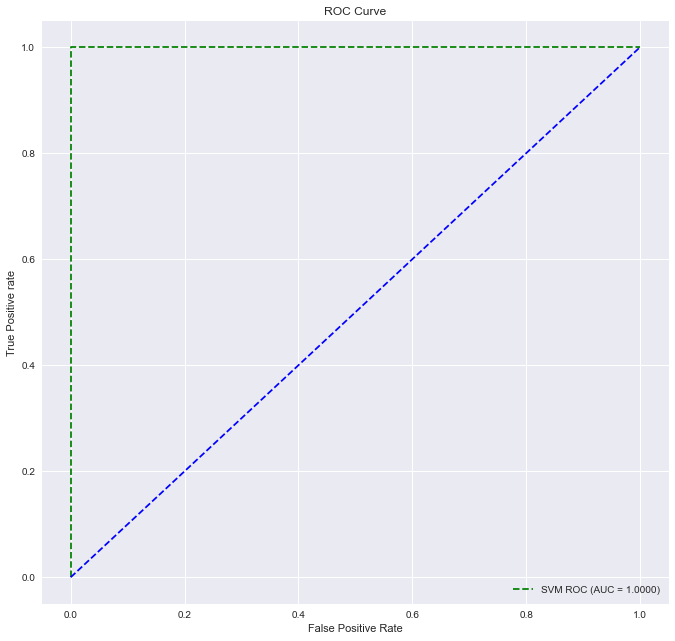

In [79]:
print_metrics(cb_clf, x_train, x_test, y_train, y_test)
plot_confusion_matrix(cb_clf, x_test, y_test)
plot_roc(cb_clf , 'SVM',x_test,y_test)

## comparison of the results

In [80]:
models = [model_knn, model_NB, model_log_reg, model_tree,
          model_SVC, rf_clf, xgb_clf, lgb_clf, cb_clf]
model_names = ['KNN', 'Naive Bayes','Logistic regression' , 'desicion tree' , 'support vector machine' , 'Random Forest' , 'XGBoost' , 'LightGBM' , 'CatBoost']
colors = ['red', 'green', 'blue', 'orange', 'black', 'yellow', 'pink', 'purple', 'brown']
index = 0
accuracy = []
precision = []
recall = []
score = []
roc = []
scores_dict = {}


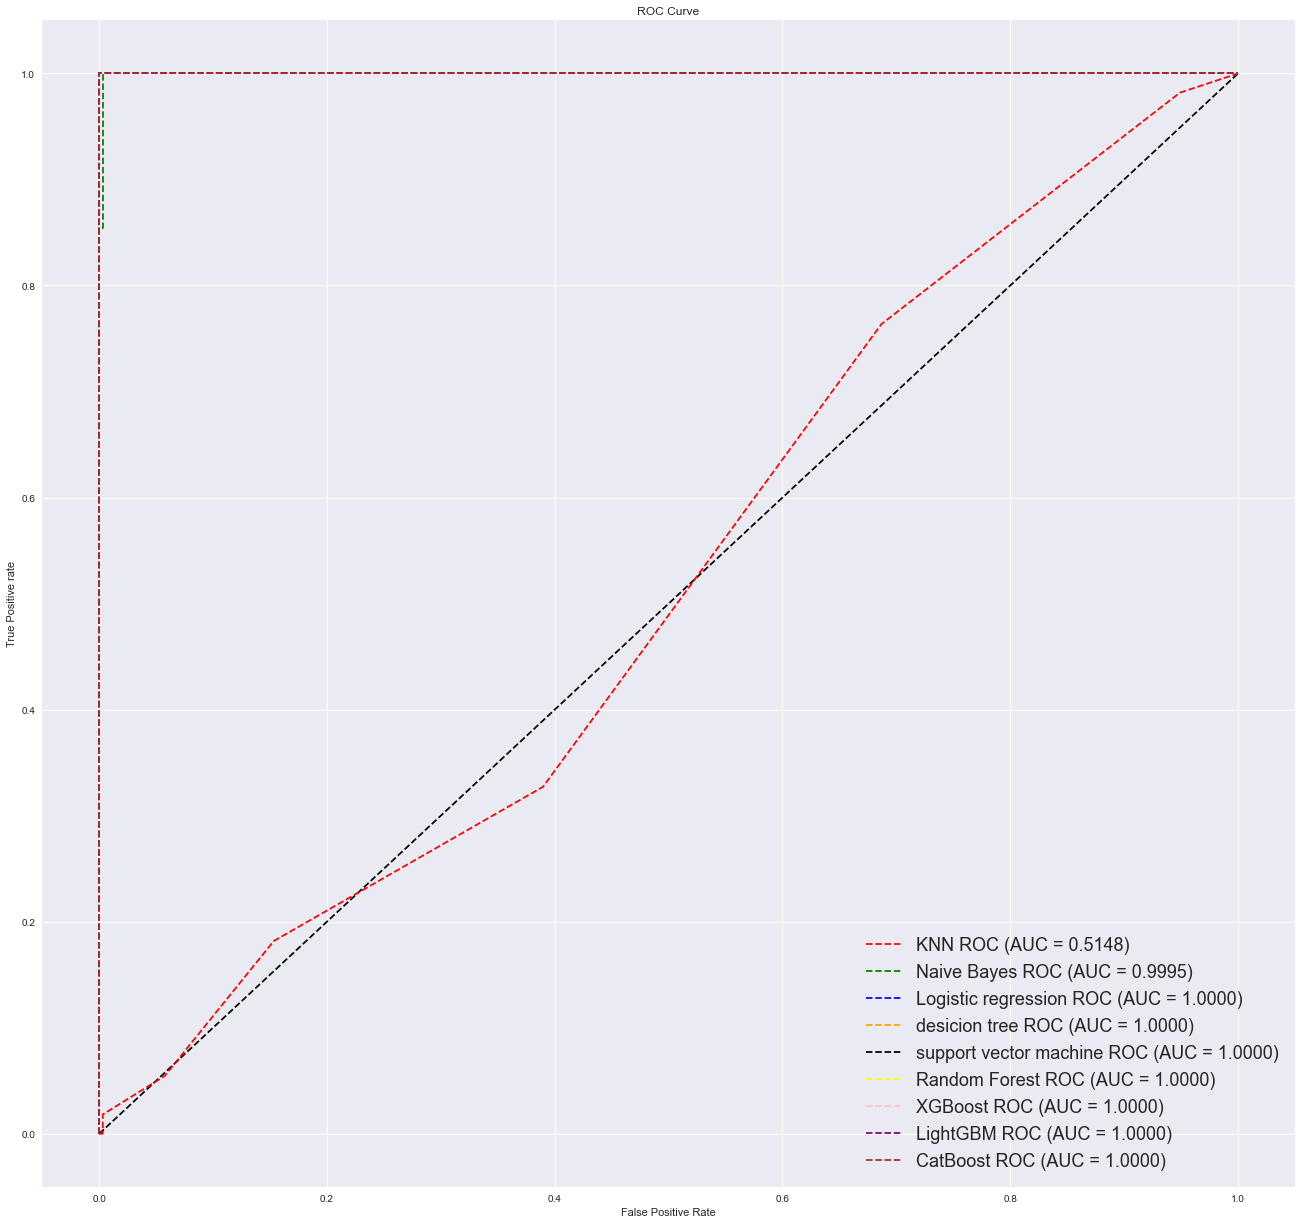

In [81]:
index = 0
# dictionary for scores 
scores_dict = {}
plt.figure(figsize=(20, 20))
plt.style.use('seaborn')
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')


for model in models:
    # changing x_test only in svm to x_test normalized
    if model == model_SVC:
        test = X_test_std
        train = X_train_std
    else:
        test = x_test

    pred_prob = model.predict_proba(test)
    fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:, 1])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle='--',
             color=colors[index], label=f'{model_names[index]} ROC (AUC = %0.4f)' % auc_score)
    index += 1

    y_pred = model.predict(test)


    scores_dict[f'{model_names[index-1]}'] = {
            'r2_score': r2_score(y_test, y_pred),
            'f1_score': f1_score(y_test, y_pred, average='binary'),
            'Test_roc': roc_auc_score(y_test, model.predict_proba(test)[:, 1]),
            'Train_roc': roc_auc_score(y_train, model.predict_proba(x_train)[:, 1]),
            'test_accuracy': model.score(test, y_test),
        }
        

plt.legend(loc='lower right')
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right' , fontsize=18)
plt.show()


In [82]:
pd.DataFrame(scores_dict).hvplot.barh(width=1400, height=2000)


:Bars   [index,Variable]   (value)

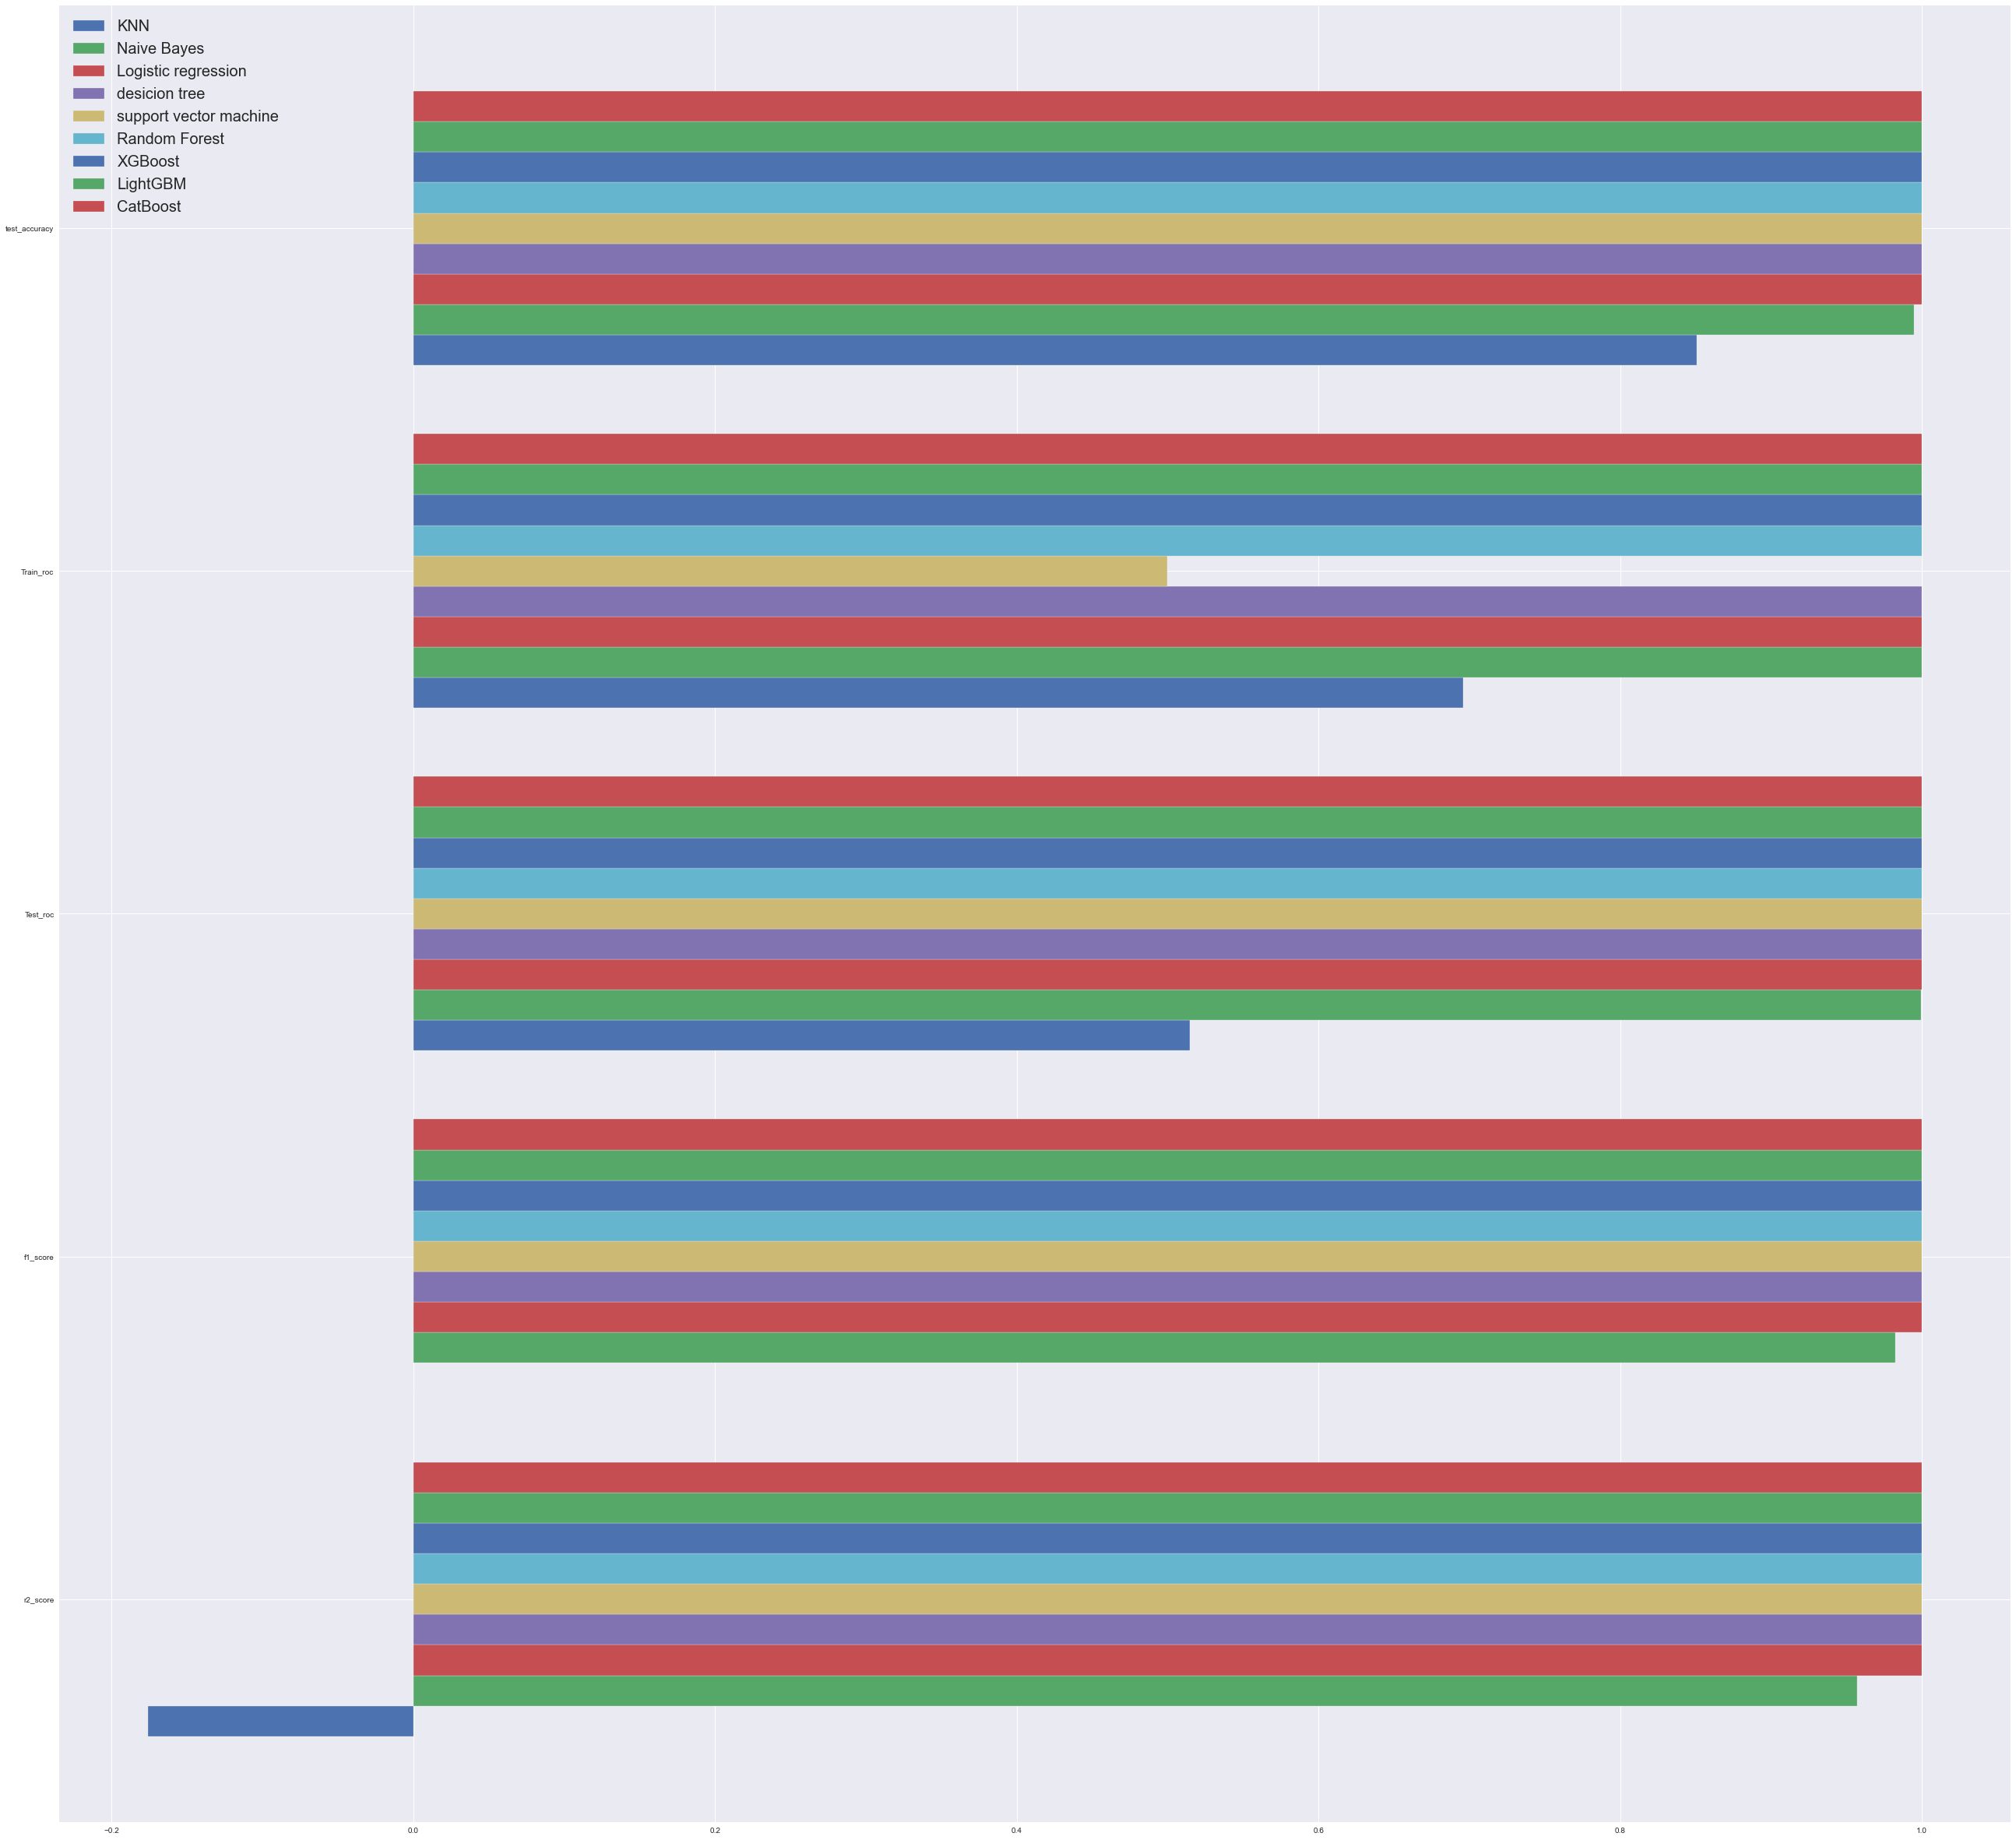

In [93]:
pd.DataFrame(scores_dict).plot(kind='barh' , width=0.8 , figsize=(40, 40))
# plt.xlabel(fontsize=20)
# plt.ylabel(fontsize=20)
plt.legend(loc='upper left', fontsize=20)
plt.show()
